### REGRESSION LINEAIRE
#### 1. Elaborer des modèles de régression linaire pour prédire la variable (target) alive. En sélectionnant comme variables explicatives (features):
###### a. age, sex, class, fare prises individuellement
###### b. age, sex, class, fare
###### c. différentes combinaisons de age, sex, class, fare
###### d. ayant une forte corrélation avec la variable alive
#### 2. Evaluer chaque modèle de régression.
#### 3. Conclure. 

-----------------------------------------------------------------------------------------------------------------

### Importer les librairies

In [141]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importer le dataset et l'explorer

In [142]:
data = pd.read_csv('trainClean.csv', sep=',', encoding='utf-8')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
PassengerId       889 non-null int64
Survived          889 non-null int64
Pclass            889 non-null int64
Name              889 non-null object
Sex               889 non-null object
Age               889 non-null float64
SibSp             889 non-null int64
Parch             889 non-null int64
Ticket            889 non-null object
Fare              889 non-null float64
Embarked          889 non-null object
Age_categories    889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


#### Simuler (Dummy) les features du dataset

In [144]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [145]:
data = create_dummies(data,"Sex")

In [102]:
#data = create_dummies(data,"Pclass")

In [47]:
#data = create_dummies(data,"Age_categories")

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 14 columns):
PassengerId       889 non-null int64
Survived          889 non-null int64
Pclass            889 non-null int64
Name              889 non-null object
Sex               889 non-null object
Age               889 non-null float64
SibSp             889 non-null int64
Parch             889 non-null int64
Ticket            889 non-null object
Fare              889 non-null float64
Embarked          889 non-null object
Age_categories    889 non-null object
Sex_female        889 non-null uint8
Sex_male          889 non-null uint8
dtypes: float64(2), int64(5), object(5), uint8(2)
memory usage: 85.2+ KB


### Création d'un train set et validation set

In [147]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=5)

In [148]:
print(X_train.shape,'\n')
print(X_valid.shape,'\n')
print(y_train.shape,'\n')
print(y_valid.shape,'\n')

(711, 13) 

(178, 13) 

(711,) 

(178,) 



### Fonction pour créer un modèle de régression linéaire, le former, le valider et afficher ses scores

In [149]:
def ModelLinear(columnNames):
    
    model = LinearRegression()
    model.fit(X_train[columnNames],y_train)
    y_predict=model.predict(X_valid[columnNames])
    
    print('coef : ', model.coef_)
    # Calculer l’erreur quadratique moyenne (erreur d’estimation) 
    print('MSE : %.2f' % mean_squared_error(y_valid,y_predict))
    #calcul du R²
    print('R² : %.2f'% r2_score(y_valid, y_predict))
    print("Model score :", model.score(X_valid[columnNames],y_valid))
    # Visualisation
    if len(columnNames)==1:
        plt.scatter(X_valid[columnNames],y_valid)
        plt.plot(X_valid[columnNames],y_predict,c='red')
        plt.show()
    else:
        for feature in columnNames:
            #print(feature)
            plt.scatter(X_valid[feature],y_valid)
        plt.plot(X_valid[columnNames],y_predict,c='red')
        plt.show()

### A. En utilisant chaque variable individuellement.
##### En fonction de l'âge

coef :  [-0.00379173]
MSE : 0.23
R² : -0.04
Model score : -0.03523409415143064


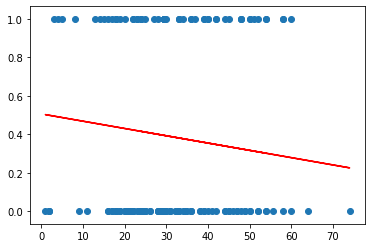

In [150]:
colName=['Age']
ModelLinear(colName)

**La valeur de R² est très petite, nous pouvons donc conclure que la feature 'Age' n'a pas une influence sur Alive**

##### En fonction de sex

coef :  [0.52719298]
MSE : 0.14
R² : 0.39
Model score : 0.3895737154276082


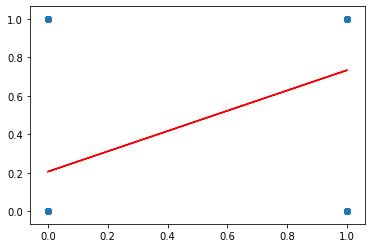

In [151]:
#colname=['Sex_male','Sex_female']
colname=['Sex_female']
ModelLinear(colname)

**La valeur de R² n'est pas très petite, nous pouvons donc conclure que la feature 'Sex' a une influence sur Alive**

##### En fonction de class

coef :  [-0.19520992]
MSE : 0.20
R² : 0.10
Model score : 0.09721990792268076


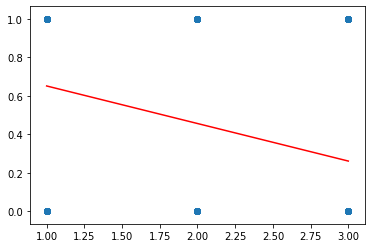

In [152]:
#colname=['Pclass_1']
colname=['Pclass']
ModelLinear(colname)

**La valeur de R² n'est pas très grande, nous pouvons donc conclure que la feature 'Pclass' a une petite influence sur Alive**

##### En fonction de Fare

coef :  [0.00268378]
MSE : 0.22
R² : 0.02
Model score : 0.015096853466737614


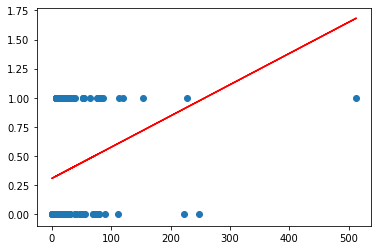

In [154]:
colname=['Fare']
ModelLinear(colname)

**La valeur de R² est très petite, nous pouvons donc conclure que la feature 'Fare' n'a pas une influence sur Alive**

### B.  En utilisant les quatre features: (age, sex, class, fare)


coef :  [-5.38982570e-03  4.69716841e-01 -1.88761793e-01  5.18520299e-05]
MSE : 0.12
R² : 0.45
Model score : 0.44889791492133435


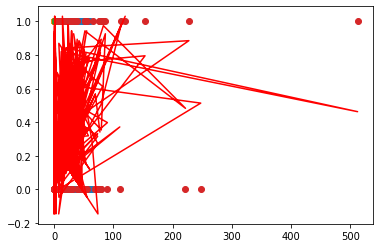

In [156]:
colname=['Age','Sex_female','Pclass','Fare']
ModelLinear(colname)

**La valeur de R²= 0.45 n'est pas trés petite, nous pouvons donc conclure que les quatre features ont une influence sur Alive**

### C.  En utilisant différentes combinaisons de age, sex, class, fare

coef :  [-0.00202818  0.48332021  0.00176298]
MSE : 0.13
R² : 0.40
Model score : 0.40209345318493595


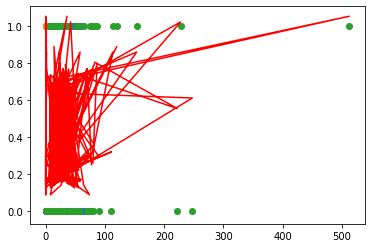

In [157]:
colname=['Age','Sex_female','Fare']
ModelLinear(colname)

**La valeur de R²= 0.40 n'est pas très petite, nous pouvons donc conclure que les trois features "Age, Sex, Fare" ont une influence sur Alive**

coef :  [-0.00469427  0.00278848]
MSE : 0.22
R² : -0.00
Model score : -0.0029684308462831765


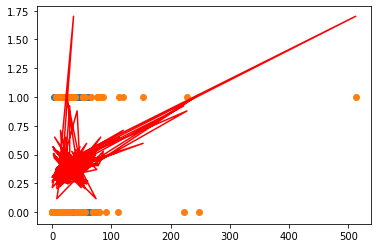

In [158]:
colname=['Age','Fare']
ModelLinear(colname)

**La valeur de R²=0, nous pouvons donc conclure que les deux features "Age, Fare" n'ont pas d'influence sur Alive**

coef :  [ 0.49468519 -0.16298047]
MSE : 0.12
R² : 0.44
Model score : 0.4410554064187764


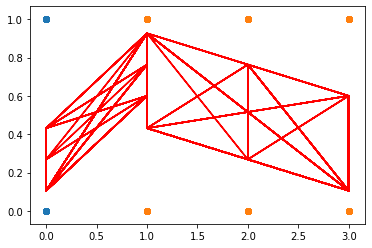

In [162]:
colname=['Sex_female','Pclass']
ModelLinear(colname)

**La valeur de R²= 0.44 n'est pas très petite, nous pouvons donc conclure que les deux features "Sex, class" ont une influence sur Alive**

coef :  [0.49166639 0.00170106]
MSE : 0.13
R² : 0.41
Model score : 0.40500970393246594


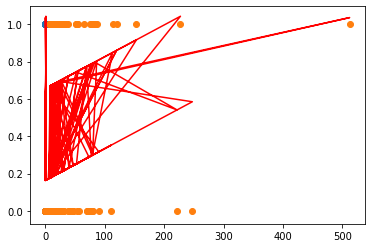

In [161]:
colname=['Sex_female','Fare']
ModelLinear(colname)

**La valeur de R²= 0.41 n'est pas très petite, nous pouvons donc conclure que les deux features "Sex, Fare" ont influence sur Alive**

coef :  [-0.00861595 -0.23654014]
MSE : 0.20
R² : 0.10
Model score : 0.09931486297167991


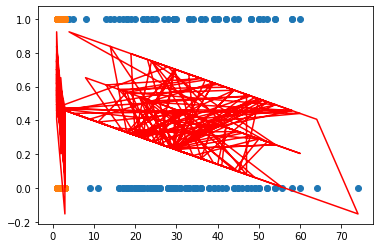

In [160]:
colname=['Age','Pclass']
ModelLinear(colname)

**La valeur de R²= 0.1 est très petite, nous pouvons donc conclure que les deux features "Age, class" n'ont pas d'influence sur Alive**

### D. En utilisant les features ayant une forte corrélation avec la variable alive


###### Tout d'abord, nous devons calculer la matrice de corrélation

In [163]:
corr = data.corr()
print(np.abs(corr['Survived']).sort_values())

PassengerId    0.005028
SibSp          0.034040
Age            0.074114
Parch          0.083151
Fare           0.255290
Pclass         0.335549
Sex_female     0.541585
Sex_male       0.541585
Survived       1.000000
Name: Survived, dtype: float64


(8.0, 0.0)

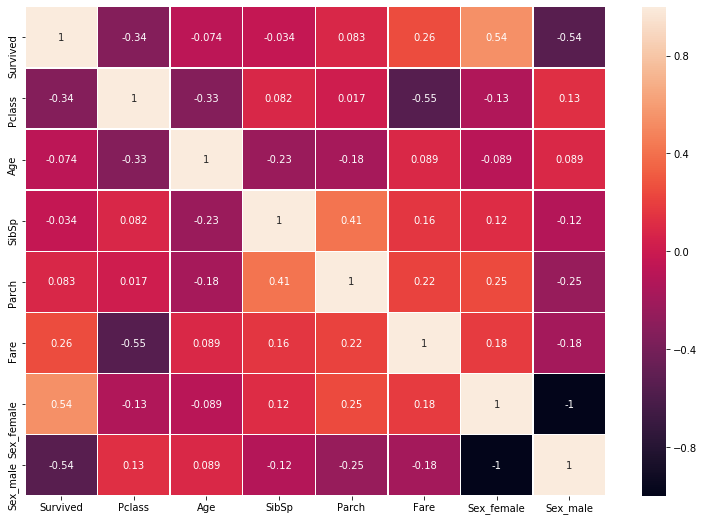

In [164]:
fig, ax = plt.subplots(figsize=(13,9))         # Sample figsize in inches
sns.heatmap(data=data.drop('PassengerId',axis=1).corr(), annot=True, linewidths=.5, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**Selon la matrice de corrélation, nous pouvons constater que les deux caractéristiques: Sex et class, ont une forte corrélation avec la cible «Alive»**

coef :  [ 0.49468519 -0.16298047]
MSE : 0.12
R² : 0.44
Model score : 0.4410554064187764


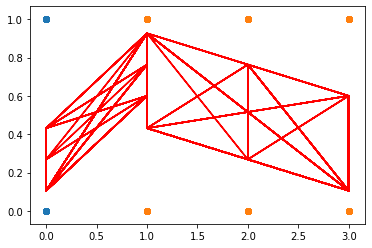

In [165]:
colname=['Sex_female','Pclass']
ModelLinear(colname)

**Nous pouvons conclure que même lorsque nous formons le modèle avec les features ayant une forte corrélation avec la target 'Alive', nous obtenons toujours une petite valeur pour R². Ce qui confirme que nous devons choisir un autre type de régression qui est la régression logistique**